# Unsupervised Analysis of Days of Week

Treating crossing each day as features to learn about the relationships between various days

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

In [2]:
from jwf.data import get_fremont_data
data = get_fremont_data()

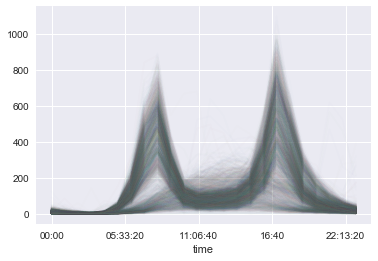

In [3]:
pivoted= data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False,alpha=0.01);

## Principle component analysis

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(2737, 24)

In [5]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(2737, 2)

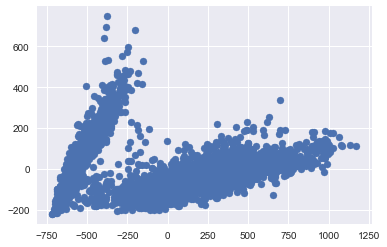

In [6]:
plt.scatter(X2[:, 0], X2[:, 1])

## Unsupervised Clustering

In [7]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

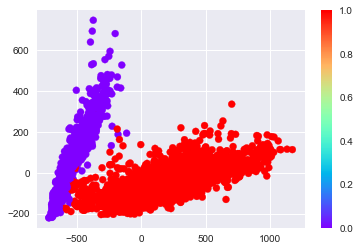

In [8]:
plt.scatter(X2[:, 0], X2[:, 1],c=labels, cmap='rainbow')
plt.colorbar();

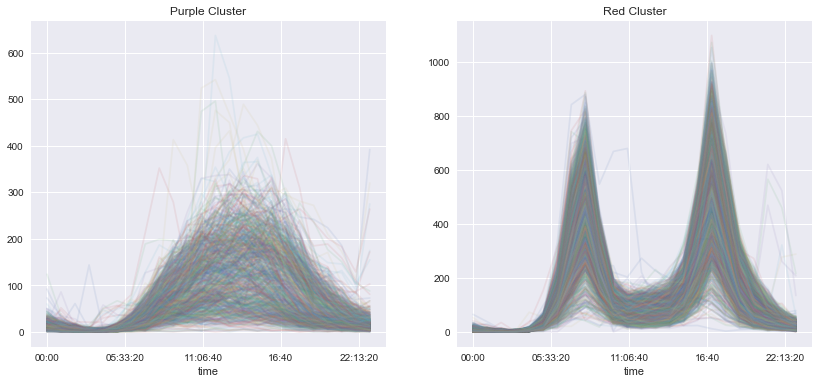

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels ==0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels ==1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

## Comparing with Day of week

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

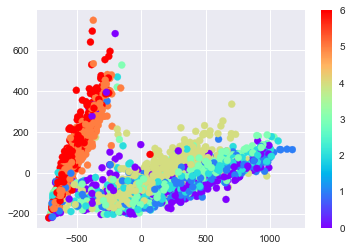

In [11]:
plt.scatter(X2[:, 0], X2[:, 1],c=dayofweek, cmap='rainbow')
plt.colorbar();

## Analysing Outliers

The follwoing points are weekdays with a holiday like pattern

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5) ]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27'],
              dtype='datetime64[ns]', length=1884, freq=None)

What's up with Feb 6, 2017 [Snow storm](https://www.seattletimes.com/seattle-news/weather/weather-service-predicts-3-to-6-inches-of-snow-in-seattle-area/)